# Analysis of Sephora Skin Care Product Popularity and the Ingredients Within
## D195 - Data Management/Analytics Undergraduate Capstone
### Vrena Ranallo


<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#load">Data Gathering and Cleaning</a></li>
<li><a href="#describe">Descriptive Statistical Analysis</a></li>
<li><a href="#regression">Regression Analysis</a></li>

</ul>




<a id='intro'></a>
## Introduction

This notebook is dedicated to the code and visual aid discussed in the project review, and informed the recommended strategy. There are three main parts to this analysis, data gathering and cleaning will be the initial EDA (exploratory data analysis) and data cleaning necessary to perform a descriptive analysis. In the next section we will dive deeper into each product type by using descriptive statistics to analyze the distribution and the five-number summary for the product price and customer rankings. Then we will perform the regression testing to determine any linear coorelation with the products ranking and the ingredients in each product.

In [1]:
# Importing necessasry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import re
import statsmodels.api as sm;

%matplotlib inline


<a id='load'></a>
## Data Gathering and Cleaning


In [2]:
# Loading dataset into a Pandas dataframe. We can ssee that this dataframe consists of 1,472 products and 11 columns.
cosmetic_prod = pd.read_csv('cosmetic_p.csv')
cosmetic_prod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   brand        1472 non-null   object 
 2   name         1472 non-null   object 
 3   price        1472 non-null   int64  
 4   rank         1472 non-null   float64
 5   ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [3]:
cosmetic_prod.head(10)


,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0


In [4]:
cosmetic_prod.tail(10)


,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
1462,Sun protect,COOLA,Summer Duo,36,4.8,Visit the COOLA boutique,0,0,0,0,0
1463,Sun protect,VITA LIBERATA,Passionflower & Argan Dry Oil Broad Spectrum S...,45,4.2,"Prunus Amygdalus Dulcis (Sweet Almond) Oil*, C...",0,0,0,0,0
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38,4.1,"Water, Cyclopentasiloxane, Butyloctyl Salicyla...",1,1,1,1,1
1465,Sun protect,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,34,4.1,-Pepha® (derived from watermelon extract): Pro...,0,0,0,0,0
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0
1471,Sun protect,DERMAFLASH,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,45,0.0,Visit the DERMAFLASH boutique,1,1,1,1,1


In [5]:
# Initial viewing of the 5-number summary that will be explored further in the next section. 
cosmetic_prod.describe()


,price,rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [6]:
# No duplicated products in the data
sum(cosmetic_prod.duplicated())


0

In [7]:
# No null/na values 
cosmetic_prod.isna().sum()


Label          0
brand          0
name           0
price          0
rank           0
ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [8]:
# This analysis will not be for skin type, therefore we are removing this from the dataset 
cosmetic_prod.drop(labels=['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'], axis=1, inplace=True)


In [9]:
cosmetic_prod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   brand        1472 non-null   object 
 2   name         1472 non-null   object 
 3   price        1472 non-null   int64  
 4   rank         1472 non-null   float64
 5   ingredients  1472 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 69.1+ KB


In [10]:
# This analysis relys heavily on the ingredients, and so we need to remove any product that doesn't include this information.
cleaned_df = cosmetic_prod[~cosmetic_prod.ingredients.str.contains("Visit")]
cleaned_df = cleaned_df[~cleaned_df.ingredients.str.contains("No Info")]

cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1470
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1329 non-null   object 
 1   brand        1329 non-null   object 
 2   name         1329 non-null   object 
 3   price        1329 non-null   int64  
 4   rank         1329 non-null   float64
 5   ingredients  1329 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 72.7+ KB


In [11]:
#Stripping the ingredient list of any spaces or periods and making it uniform and ready for further analysis.
cleaned_df.ingredients = cleaned_df.ingredients.str.lower().replace(r'\.', '')

cleaned_df


,Label,brand,name,price,rank,ingredients
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"algae (seaweed) extract, mineral oil, petrolat..."
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"galactomyces ferment filtrate (pitera), butyle..."
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"water, dicaprylyl carbonate, glycerin, ceteary..."
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"algae (seaweed) extract, cyclopentasiloxane, p..."
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"water, snail secretion filtrate, phenyl trimet..."
...,...,...,...,...,...,...
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"water, butylene glycol, peg-8, glycerin, undec..."
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"water, alcohol denat., potassium cetyl phospha..."
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"water, isododecane, dimethicone, butyloctyl sa..."
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"water, dihydroxyacetone, glycerin, sclerocarya..."


<a id='describe'></a>
## Descriptive Statistical Analysis


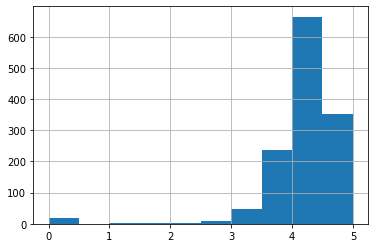

In [12]:
cleaned_df['rank'].hist();


This initial histogram tell us that most products rank above a 4 and there are missing values. Sephora ranks products 1 - 5.

In [13]:
cleaned_df['rank'].describe()


count    1329.000000
mean        4.150188
std         0.631742
min         0.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rank, dtype: float64

This confirms that there are no outliers in the upper range, but we need to investigate the missing values.

In [14]:
no_rank = cleaned_df[(cleaned_df['rank'] == 0)]
no_rank.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 97 to 1410
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        17 non-null     object 
 1   brand        17 non-null     object 
 2   name         17 non-null     object 
 3   price        17 non-null     int64  
 4   rank         17 non-null     float64
 5   ingredients  17 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 952.0+ bytes


In [15]:
no_rank.Label.value_counts()


Cleanser       5
Face Mask      4
Moisturizer    3
Eye cream      3
Treatment      1
Sun protect    1
Name: Label, dtype: int64

There are a total of 17 products missing the rank. Since this is a very small percentage of the overall dataframe I am comfortable removing these.

In [16]:
no_rank.head(17)


,Label,brand,name,price,rank,ingredients
97,Moisturizer,LA MER,The Concentrate Mini,190,0.0,"cyclopentasiloxane, algae (seaweed) extract, g..."
116,Moisturizer,SK-II,Facial Treatment Essence Karan Singh Limited E...,229,0.0,"galactomyces ferment filtrate*, butylene glyco..."
279,Moisturizer,CLINIQUE,Limited Edition Dramatically Different Moistur...,39,0.0,"water, mineral oil/paraffinum liquidum/huile m..."
365,Cleanser,ESTÉE LAUDER,Nutritious Radiant Vitality Energy Lotion,58,0.0,nutritious vitality8 egy lot int m division: e...
389,Cleanser,FRESH,Rose Deep Hydration Toner Mini,25,0.0,"water, glycerin, butylene glycol, rosa centifo..."
452,Cleanser,MURAD,Clarifying Toner,24,0.0,"water, witch hazel water, butylene glycol, alc..."
531,Cleanser,KATE SOMERVILLE,Kate's Mini Must Haves,55,0.0,"isopropyl alcohol, water, camphor, magnesium a..."
534,Cleanser,PHILOSOPHY,Purity Made Simple® Facial Cleansing Gel & Eye...,23,0.0,"water, sodium trideceth sulfate, disodium laur..."
752,Treatment,PETER THOMAS ROTH,AHA/BHA Acne Clearing Gel,54,0.0,"alcohol denat.,aloe barbadensis leaf juice, ar..."
864,Face Mask,GLAMGLOW,The Ultimate Glow Set,169,0.0,-charcoal: detoxifies.\r\r\n-volcanic pumice: ...


In [17]:
cleaned_df = cleaned_df.drop(cleaned_df[(cleaned_df['rank'] == 0)].index)
cleaned_df.shape


(1312, 6)

In [18]:
# Multiplying the rank by 10 to remove the decimal which will make the visualizations easier to read.
cleaned_df['rank'] = cleaned_df['rank'].apply(lambda x: x*10)
cleaned_df['rank'].describe()


count    1312.000000
mean       42.039634
std         4.219379
min        10.000000
25%        40.000000
50%        43.000000
75%        45.000000
max        50.000000
Name: rank, dtype: float64

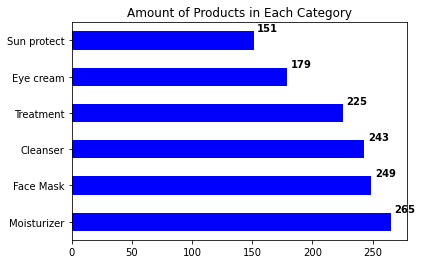

In [19]:
ax = cleaned_df.Label.value_counts().plot(kind='barh', color='blue')
ax.set_title('Amount of Products in Each Category')
for i, v in enumerate(cleaned_df.Label.value_counts()):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')


This bar chart shows the count of each product type. It tells us that the most common type of product is Moisturizer with over 250 products. Face Masks, Cleansers, and Treatments have over 200. Eye Cream and Sunscreen products are the least frequent but still have over 150 each.

We can see our first limitation with this dataset. We started with over 1,400 products, after removing entries with missing data and then breaking them into 6 categories we have between 150 and 250 for each product type.

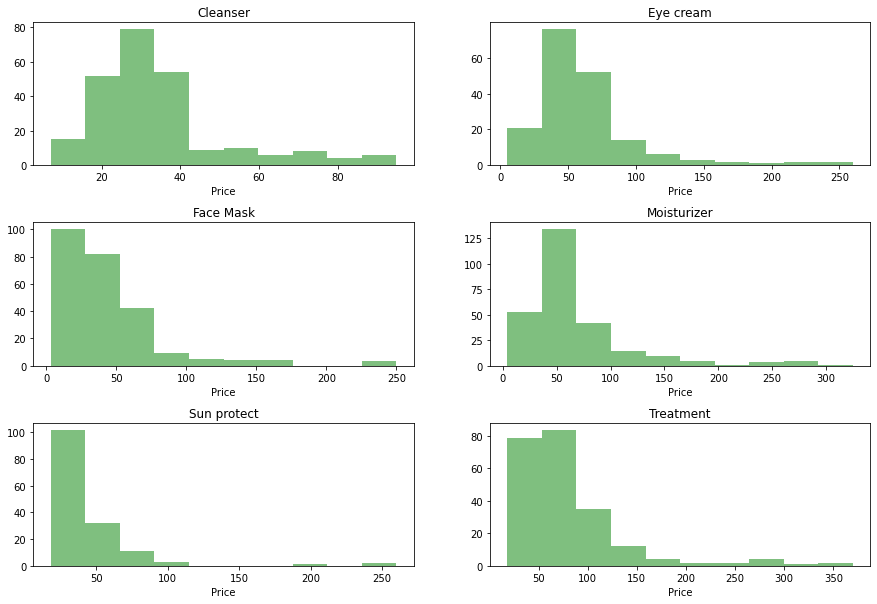

In [20]:
grouped = cleaned_df.groupby('Label')

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# Loop through the groups and plot a histogram for each group
for ax, (name, group) in zip(axs, grouped):
    ax.hist(group['price'], color = 'green', alpha=0.5, label=name)
    ax.set_title(name)
    ax.set_xlabel('Price')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()


In these side-by-side histograms, we can see the distribution of the price for each product type. It shows that Treatment has the largest price range between 20 - 350. Cleansers, which has the most products in the dataset has the smallest price range. The majority of the products overall is less than 75.

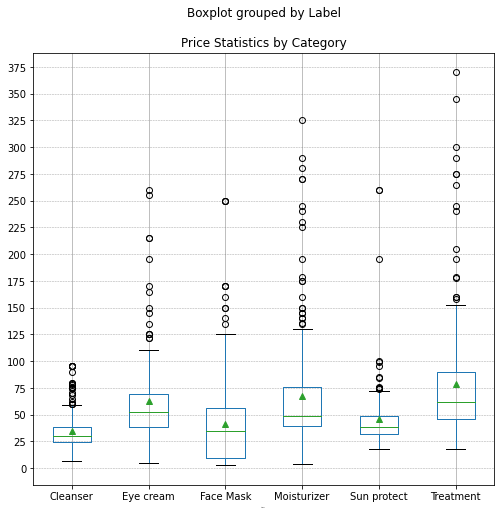

In [21]:
ax = cleaned_df.boxplot(column=['price'],by=['Label'],figsize=(8,8), showmeans=True)
plt.title('Price Statistics by Category', fontsize =12)
plt.xlabel('Category', fontsize=0)
ax.grid(visible=True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
ax.yaxis.set_ticks(np.arange(0, cleaned_df['price'].max()+25, 25));


Using a boxplot can be easier to see possible outliers in each category and a more detailed spread. For the purpose of this analysis it is enough to see the following: <br/>

**Cleanser** - majority of products priced between 25 and 40. There are cases to go above 50, but there isn't a huge variation in price.  <br/>
**Eye Cream** - Majority of products priced between 40 and 70, with a much larger price variation compared to cleansers. <br/>
**Face Masks** - Here we have another limitation, masks are sold in jars, tubes, and as single-use sheet masks. This data doesn't capture any subtypes which will likily have an affect on the overall price. I recommend using a different dataset for a more thorough analysis of the prices.<br/>
**Moisturizer** - Majority of products priced between 40 and 75. I could see this catayory having a similar but less drastic limitation as found in masks. In general, moisturizers are broken into a lower priced "day" moisturizer and "night" creams that are typically  more expensive. <br/>
**Sun Protect** - Like the cleanser this has a smaller price variation with two major possible outliers in the upper range. Majority of products priced between 30 and 50.<br/>
**Treatment** - This category has a huge range in their prices which could indicate additional subcategories needed to make a full analysis. <br/>

As price is not a major component of this analysis I am not going to investigate the outliers further. 

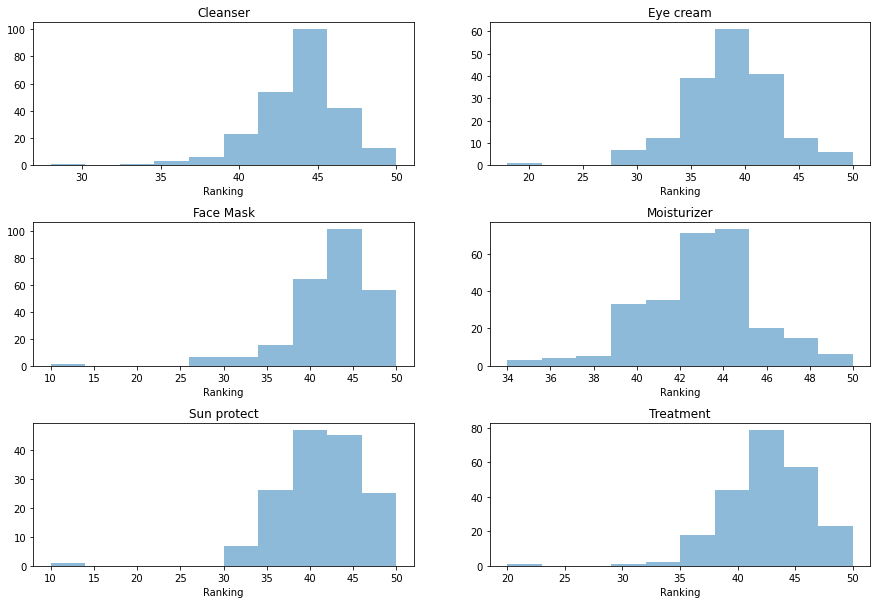

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# Loop through the groups and plot a histogram for each group
for ax, (name, group) in zip(axs, grouped):
    ax.hist(group['rank'], alpha=0.5, label=name)
    ax.set_title(name)
    ax.set_xlabel('Ranking')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()


Each category seems to have very favorable ratings, the majority ranking above 35. Cleaners and Moisturizers and have the highest rankings over 42. 

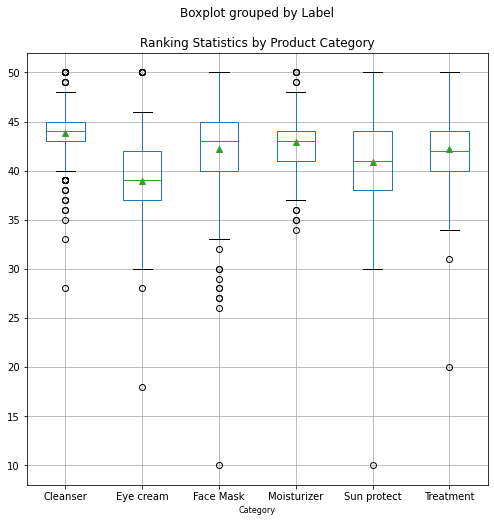

In [23]:
cleaned_df.boxplot(column=['rank'],by=['Label'],figsize=(8,8), showmeans=True)
plt.title('Ranking Statistics by Product Category', fontsize =12)
plt.xlabel('Category', fontsize=8);


As with the price analysis, using the boxplot allows us to see a more complete picture of the customer rankings. Cleansers generally have the highest rankings and a few outliers in the upper and lower bounds. Eye Cream, Face Masks, Sun protect, and Treatments still have favorable rankings but are alot more varied.  

<a id='regression'></a>
## Regression Analysis


<ul>
<li><a href="#func">Preproecssing and Function Definitions</a></li> 
<li><a href="#clean">Cleanser</a></li>
<li><a href="#mask">Face Mask</a></li>
<li><a href="#moisture">Moisturizer</a></li>
<li><a href="#eyecream">Eye Cream</a></li>
<li><a href="#treat">Treatment</a></li>
<li><a href="#sunscreen">Sun Protect</a></li>
</ul>




<a id='func'></a>
### Preproecssing and Function Definitions

This regression needs to be run on each of the 6 product types. As such, there are a series of functions defined to extract the ingredients, rank ingredients, fit the model, predict the model, and then functions for the visual displays. 

Creating these functions will also allow this to be run on any additional product types. 

In [24]:
#Creating a dataframe for each product type. 
cleanser = cleaned_df[(cleaned_df.Label == 'Cleanser')]
masks = cleaned_df[(cleaned_df.Label == 'Face Mask')]
moisturizer = cleaned_df[(cleaned_df.Label == 'Moisturizer')]
eye_cream = cleaned_df[(cleaned_df.Label == 'Eye cream')]
treatment = cleaned_df[(cleaned_df.Label == 'Treatment')]
sunscreen = cleaned_df[(cleaned_df.Label == 'Sun protect')]


In [25]:
def extract_ingredient_by_product(product_df):
    '''
    Function to extract ingredients and store it in a dictionary with the product type as the key.
    INPUT:
     - Data Frame
      -- This will also be used as the key in the dictionary.
    OUTPUT:
    - Product Name, as dictionary key
    - Ingredient list
    '''
    ingredient_list = []
    product_df['ingredients'].apply(lambda x: [ingredient_list.append(i) for i in x.split(',')])
    product_name = product_df.name
    return (product_name,ingredient_list)

products_ingredient_lists = {}

product_name,ingredient_list = extract_ingredient_by_product(cleanser)
products_ingredient_lists['cleanser'] = ingredient_list

product_name,ingredient_list = extract_ingredient_by_product(masks)
products_ingredient_lists['masks'] = ingredient_list

product_name,ingredient_list = extract_ingredient_by_product(moisturizer)
products_ingredient_lists['moisturizer'] = ingredient_list

product_name,ingredient_list = extract_ingredient_by_product(eye_cream)
products_ingredient_lists['eye_cream'] = ingredient_list

product_name,ingredient_list = extract_ingredient_by_product(treatment)
products_ingredient_lists['treatment'] = ingredient_list

product_name,ingredient_list = extract_ingredient_by_product(sunscreen)
products_ingredient_lists['sunscreen'] = ingredient_list



In [26]:
# Additional cleaning was needed once the ingredients were separated
# For loop goes through each products ingredient list and strips the spaces and periods. 
for product_name, ingredient_list in products_ingredient_lists.items():
    products_ingredient_lists[product_name] = list(map(lambda x: x.strip(' .'), ingredient_list))


In [27]:
# These ingredients are generally used as stabilizers, preservatives, or a pH balancer for the formulation.
# Example Phenoxyethanol is use as a preservative and doesn't have a skin benefit. 
# Each ingredient and it's use is included in the project report.
ingredients_to_remove = ['water', 'xanthan gum', 'phenoxyethanol', 'sodium chloride', 'polysorbate 20', 
                         'disodium edta', 'stearic acid', 'sodium benzoate', 'potassium sorbate', 
                         'chlorphenesin', 'propylene glycol', 'potassium hydroxide', 'carbomer', 'sodium citrate', 
                         'hexylene glycol', 'methylparaben', 'acrylates/C10-30 alkyl acrylate crosspolymer', 
                         '1,2-hexanediol', 'acrylates copolymer', '1', 'myristic acid', 'cocamidopropyl betaine', 
                         'dipropylene glycol', '2-hexanediol', 'methylisothiazolinone', 
                         'leuconostoc/radish root ferment filtrate', 'lecithin', 'magnesium aluminum silicate', 
                         'benzyl alcohol', 'methylchloroisothiazolinone', 'bht', 'glycol distearate', 
                         'cocamidopropyl hydroxysultaine', 'ethylhexylglycerin', 'silica', 'cyclopentasiloxane', 
                         'glyceryl stearate', 'sodium hydroxide', 'fragrance', 'linalool', 'limonene', 'citronellol', 
                         'geraniol', 'hexyl cinnamal', 'butylphenyl methylpropional', 'citral', 'butyloctyl salicylate', 
                         'mica']

for product_name, ingredient_list in products_ingredient_lists.items():
    for ingredient in ingredients_to_remove:
        while ingredient in ingredient_list:
            ingredient_list.remove(ingredient)
          
          

In [28]:
# This loops through each products ingredients and counts them for further analysis.
products_ingredient_counts = {}
for product_name, ingredient_list in products_ingredient_lists.items():
    products_ingredient_counts[product_name] = Counter(ingredient_list)
    

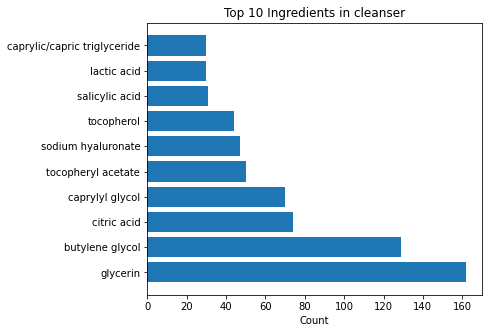

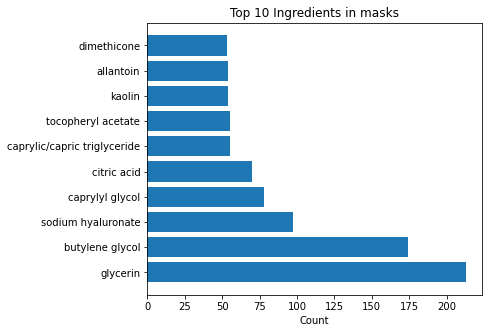

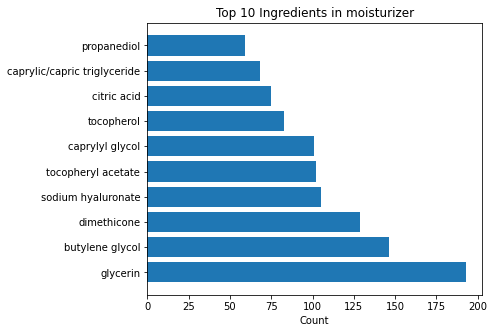

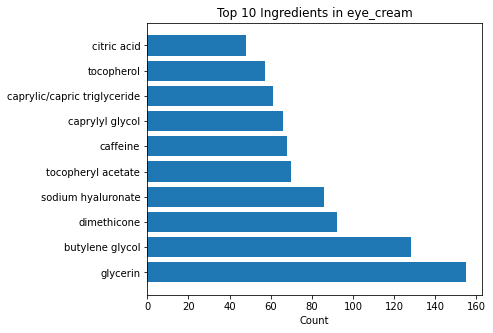

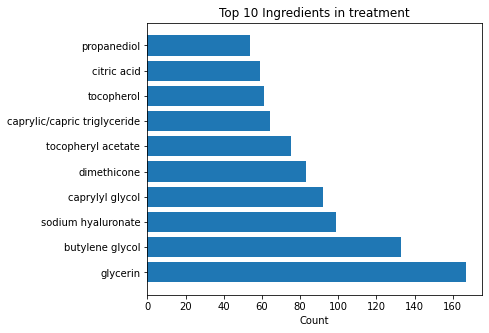

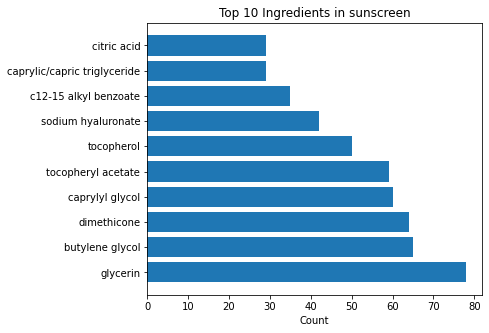

In [29]:
# Loops through the counted ingredients and outputs a bar chart for each product type 
# with their top 10 ingredients 
for product_name, ingredient_counts in products_ingredient_counts.items():
    # Get the top 10 ingredients by count
    top_ingredients = ingredient_counts.most_common(10)
    # Extract the ingredient names and counts
    ingredient_names = [i[0] for i in top_ingredients]
    ingredient_counts = [i[1] for i in top_ingredients]
    # Create a bar chart
    plt.figure(figsize=(6,5))
    plt.barh(ingredient_names, ingredient_counts)
    plt.title(f"Top 10 Ingredients in {product_name}")
    plt.xlabel("Count")
    plt.show()
    

In [30]:
# Stores the top ingredients in a list
cleanser_ing = ['glycerin', 'butylene glycol', 'citric acid', 'caprylyl glycol', 'tocopheryl acetate', 
                'sodium hyaluronate', 'tocopherol', 'salicylic acid', 'lactic acid', 
                'caprylic/capric triglyceride']

mask_ing = ['glycerin', 'butylene glycol', 'sodium hyaluronate', 'caprylyl glycol', 'citric acid', 
            'caprylic/capric triglyceride', 'tocopheryl acetate', 'kaolin', 'allantoin', 'dimethicone']

moisturizer_ing = ['glycerin', 'butylene glycol', 'dimethicone', 'sodium hyaluronate', 'tocopheryl acetate', 
                   'caprylyl glycol', 'tocopherol', 'citric acid', 'caprylic/capric triglyceride', 'propanediol']

eye_cream_ing = ['glycerin', 'butylene glycol', 'dimethicone', 'sodium hyaluronate', 'tocopheryl acetate', 
                 'caffeine', 'caprylyl glycol', 'caprylic/capric triglyceride', 'tocopherol', 'citric acid']

treatment_ing = ['glycerin', 'butylene glycol', 'sodium hyaluronate', 'caprylyl glycol', 'dimethicone', 
                 'tocopheryl acetate', 'caprylic/capric triglyceride', 'tocopherol', 'citric acid', 'propanediol']


sunscreen_ing = ['glycerin', 'butylene glycol', 'dimethicone', 'caprylyl glycol', 'tocopheryl acetate', 
                 'tocopherol', 'sodium hyaluronate', 'citric acid', 'c12-15 alkyl benzoate', 
                 'caprylic/capric triglyceride']



In [31]:
def add_ingredient_columns(df, ingredients):
    '''
    Function to add the top 10 ingredients as a column in a new dataframe and encodes the columns with a 1 or 0
    depending on it the ingredient is in the product. 
    INPUT:
     - Data Frame
     - List of top Ingredients
    OUTPUT:
     - Copy of the dataframe with columns for the ingredients.
    '''
    df_new = df.copy()
    for ingredient in ingredients:
        ingredient_regex = re.escape(ingredient)
        df_new[ingredient] = df_new['ingredients'].str.contains(ingredient_regex,).astype(int)
    return df_new


In [32]:
def fit_mlr(df, independent_vars):
    '''
    Function to fit the Multi Linear Regression using Ordinary Least Squares
    INPUT:
     - DataFrame
     - Independent Variables, in our case this is the ingredients
    OUTPUT:
     - Prints the result summary
     - Returns fitted Model
    '''
    # Add intercept as a constant variable for the MLR
    df["Intercept"] = 1
    X = df[["Intercept"] + independent_vars]
    y = df["rank"]
    model = sm.OLS(y, X).fit()
    
    # Print the model summary
    print(model.summary())
    return model


In [33]:
def predict_mlr(fitted_model, df):
    '''
    Function to predict the model
    INPUT:
     - Fitted Model
     - Data Frame
    OUTPUT:
     - Predicted Model
    '''
    X = df[fitted_model.model.exog_names]
    return fitted_model.predict(X)


In [34]:
def scatterplot_mlr_results(df, y_pred, name):
    '''
    Function to plot the results of the regression model
    INPUT:
     - Target Variable - in this case, the rank
     - Predicted Model
     - Dataframe name
    OUTPUT:
     - Scatter Plot with the predicted vs actual values
    '''
    y = df['rank']
    plt.scatter(y, y_pred)
    plt.plot(np.unique(y), np.poly1d(np.polyfit(y, y_pred, 1))(np.unique(y)))
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual Values using {} Data'.format(name))
    plt.show()


In [35]:
def create_correlation_plot(df, independent_vars, name):
    '''
    Function to create a correlation heat map that will help determine multicollinearity 
    in our model
    INPUT:
     - Data Frame
     - Independent Variables (ingredients)
    OUTPUT:
     - Correlation heatmap 
    '''
    correlation = df[independent_vars].corr()
    f, ax = plt.subplots(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    cmap = sb.diverging_palette(230, 20, as_cmap=True)
    sb.heatmap(correlation, annot=True, mask = mask, cmap=cmap)
    plt.title(f'Correlation Heatmap for {name}')
    plt.show()


<a id='clean'></a>
### Cleanser


In [36]:
# Call the function with dataframe and ingredients list
cleanser_new = add_ingredient_columns(cleanser, cleanser_ing)

# Display the resulting DataFrame
cleanser_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 298 to 578
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         243 non-null    object 
 1   brand                         243 non-null    object 
 2   name                          243 non-null    object 
 3   price                         243 non-null    int64  
 4   rank                          243 non-null    float64
 5   ingredients                   243 non-null    object 
 6   glycerin                      243 non-null    int64  
 7   butylene glycol               243 non-null    int64  
 8   citric acid                   243 non-null    int64  
 9   caprylyl glycol               243 non-null    int64  
 10  tocopheryl acetate            243 non-null    int64  
 11  sodium hyaluronate            243 non-null    int64  
 12  tocopherol                    243 non-null    int64  
 13  sal

In [37]:
# Call model to fit, then predict the model. It will also print out the summary results. 
cleanser_model = fit_mlr(cleanser_new, cleanser_ing)
cleanser_predict = predict_mlr(cleanser_model, cleanser_new)


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9807
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.461
Time:                        11:11:15   Log-Likelihood:                -591.88
No. Observations:                 243   AIC:                             1206.
Df Residuals:                     232   BIC:                             1244.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The R-Squared number indicates that only 3.5% of the variation in the dependent variable can be explained by the independent variables. However, an adjusted r-squared score of -0.007 indicated that this model isn't a great fit for the data, the p-value of 0.5 also validated that this is not a great fit for the model. 

The independent variable's coefficients, t-statistics, and the p-values determine if each variable is statistically significant in predicting the dependent variable. In this case, some of the coefficients are positive, and others are negative which could indicate multicollinearity in the model and will need further exploration. Each independent variable in this test has a p-value greater than 0.05 which means that none of them are statistically significant in explaining the dependent variable. 

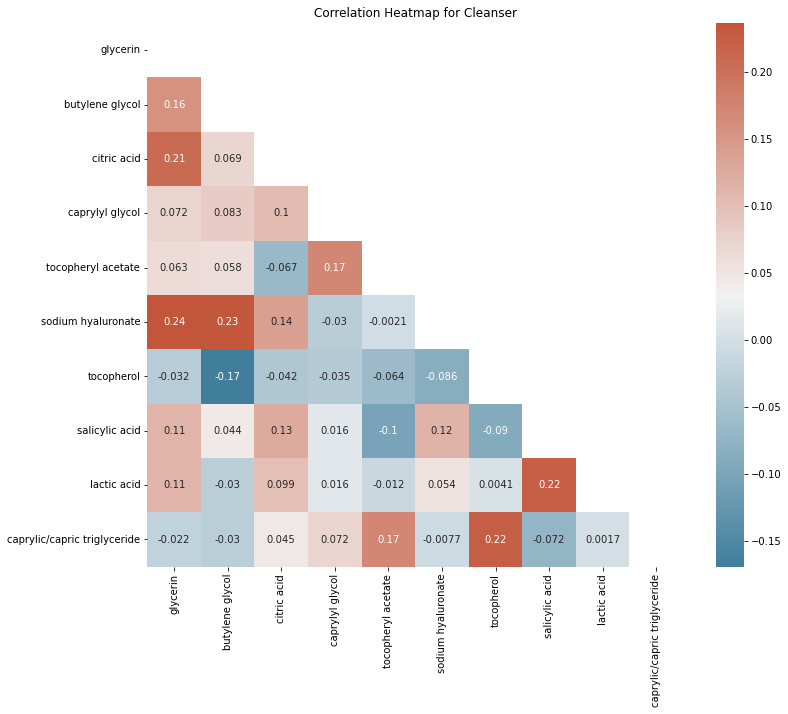

In [38]:
# Call correlation plot funtion.
cleanser_corr = create_correlation_plot(cleanser_new, cleanser_ing, 'Cleanser')


This heatmap charts the strength of the relationships between all of the independent variables. To be statistically significant and indicate multicollinearity we would need to have a coefficient greater than 0.7. The highest coefficient is 0.3 between lactic acid and sodium hydroxide, therefore we don't have any relationships strong enough between our independent variables to illustrate multicollinearity. 


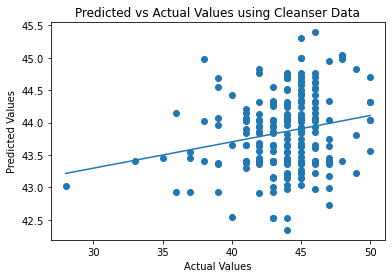

In [39]:
# Call scatterplot funtion.
cleanser_scatter = scatterplot_mlr_results(cleanser_new, cleanser_predict, 'Cleanser');


This scatter plot with the predicted vs actual values tells me that there isn't a clear linear relationship between the independent variables and the dependent variables. I want to examine a correlation map to see if there are independent variables with multicollinearity that should be removed for a better model fit. 

Based on this analysis we fail to reject the null hypothesis for cleanser ingredients affecting customer ranking. 

<a id='mask'></a>
### Face Mask


In [40]:
# Call the function with dataframe and ingredients list
masks_new = add_ingredient_columns(masks, mask_ing)

# Display the resulting DataFrame
masks_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 827 to 1092
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         249 non-null    object 
 1   brand                         249 non-null    object 
 2   name                          249 non-null    object 
 3   price                         249 non-null    int64  
 4   rank                          249 non-null    float64
 5   ingredients                   249 non-null    object 
 6   glycerin                      249 non-null    int64  
 7   butylene glycol               249 non-null    int64  
 8   sodium hyaluronate            249 non-null    int64  
 9   caprylyl glycol               249 non-null    int64  
 10  citric acid                   249 non-null    int64  
 11  caprylic/capric triglyceride  249 non-null    int64  
 12  tocopheryl acetate            249 non-null    int64  
 13  ka

In [41]:
# Call model to fit, then predict the model. It will also print out the summary results. 
masks_model = fit_mlr(masks_new, mask_ing)
masks_predict = predict_mlr(masks_model, masks_new)


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.758
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0691
Time:                        11:11:15   Log-Likelihood:                -743.13
No. Observations:                 249   AIC:                             1508.
Df Residuals:                     238   BIC:                             1547.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The R-Squared number indicates that only 6.9% of the variation in the dependent variable can be explained by the independent variables. However, an adjusted r-squared score of -0.030 indicated that this model isn't a great fit for the data, the p-value of 0.0691 also validated that this is not a great fit for the model. 

The independent variable's coefficients, t-statistics, and p-values determine if each variable is statistically significant in predicting the dependent variable. In this case, some of the coefficients are positive, and others are negative which could indicate multicollinearity in the model and will need further exploration. Kaolin and caprylic/capric triglyceride both have positive correlation and a p-value less then 0.05 which could indicate significants, but we need to explore the model further.

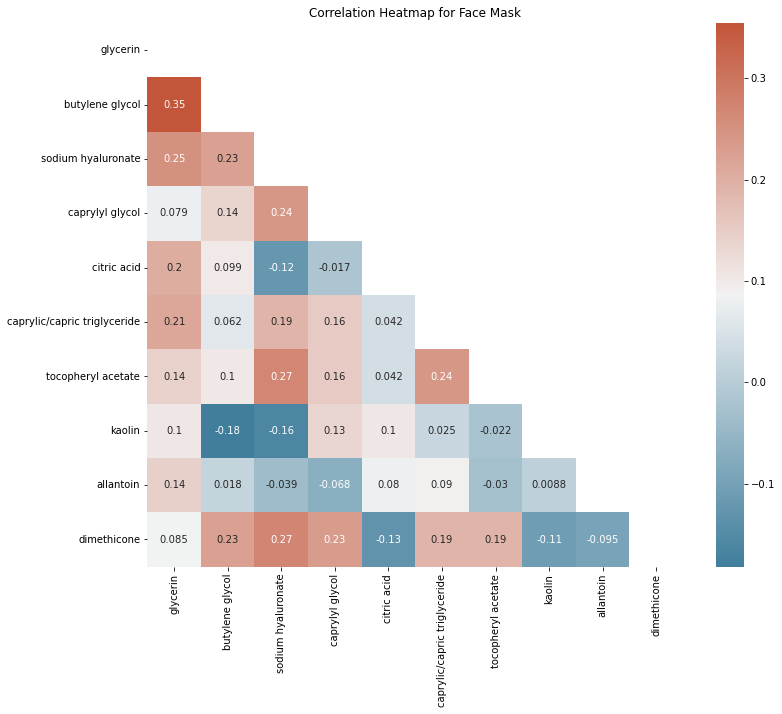

In [42]:
# Call correlation plot funtion.
mask_corr = create_correlation_plot(masks_new, mask_ing, 'Face Mask')


This heatmap charts the strength of the relationships between all of the independent variables. To be statistically significant and indicate multicollinearity we would need to have a coefficient greater than 0.7. The highest coefficient is 0.35 between butylene glycol and glycerin, therefore we don't have any relationships strong enough between our independent variables to illustrate multicollinearity. 



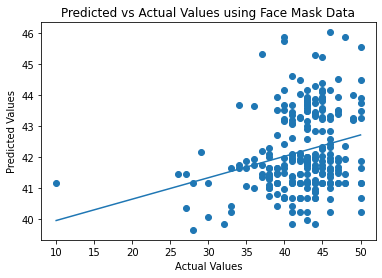

In [43]:
# Call scatterplot funtion.
masks_scatter = scatterplot_mlr_results(masks_new, masks_predict, 'Face Mask')


This scatter plot with the predicted vs actual values tells me that there isn't a clear linear relationship between the independent variables and the dependent variables. I want to examine a correlation map to see if there are independent variables with multicollinearity that should be removed for a better model fit. 

Based on this analysis we fail to reject the null hypothesis for face mask ingredients affecting customer ranking. 

<a id='moisture'></a>
### Moisturizer


In [44]:
# Call the function with dataframe and ingredients list
moisturizer_new = add_ingredient_columns(moisturizer, moisturizer_ing)

# Display the resulting DataFrame
moisturizer_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 297
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         265 non-null    object 
 1   brand                         265 non-null    object 
 2   name                          265 non-null    object 
 3   price                         265 non-null    int64  
 4   rank                          265 non-null    float64
 5   ingredients                   265 non-null    object 
 6   glycerin                      265 non-null    int64  
 7   butylene glycol               265 non-null    int64  
 8   dimethicone                   265 non-null    int64  
 9   sodium hyaluronate            265 non-null    int64  
 10  tocopheryl acetate            265 non-null    int64  
 11  caprylyl glycol               265 non-null    int64  
 12  tocopherol                    265 non-null    int64  
 13  citri

In [45]:
# Call model to fit, then predict the model. It will also print out the summary results. 
moisturizer_model = fit_mlr(moisturizer_new, moisturizer_ing)
moisturizer_predict = predict_mlr(moisturizer_model, moisturizer_new)


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.365
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.197
Time:                        11:11:15   Log-Likelihood:                -635.13
No. Observations:                 265   AIC:                             1292.
Df Residuals:                     254   BIC:                             1332.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The R-Squared number indicates that only 5.1% of the variation in the dependent variable can be explained by the independent variables. However, an adjusted r-squared score of 0.014 indicated that this model isn't a great fit for the data, the p-value of 0.197 also validates that this is not a great fit for the model. 

The independent variable's coefficients, t-statistics, and p-values determine if each variable is statistically significant in predicting the dependent variable. In this case, some of the coefficients are positive, and others are negative which could indicate multicollinearity in the model and will need further exploration. Butylene glycol has a negative correlation and a p-value of 0.004 which could indicate significants, but we need to explore the model further.

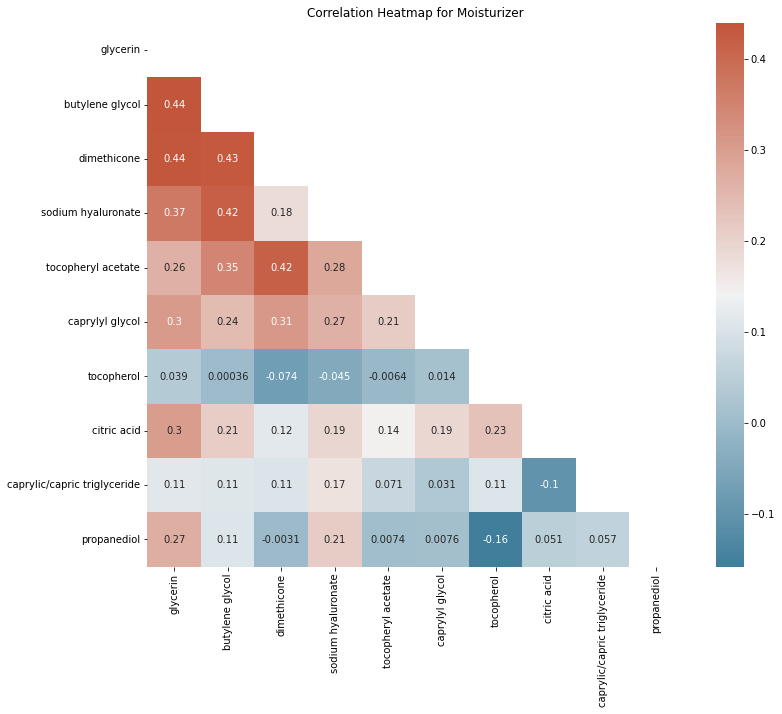

In [46]:
# Call correlation plot funtion.
moisturizer_corr = create_correlation_plot(moisturizer_new, moisturizer_ing, 'Moisturizer')


This heatmap charts the strength of the relationships between all of the independent variables. To be statistically significant and indicate multicollinearity we would need to have a coefficient greater than 0.7. The highest coefficient is 0.44 between butylene glycol and glycerin as well as dimethicone and glycerin, therefore we don't have any relationships strong enough between our independent variables to illustrate multicollinearity. 



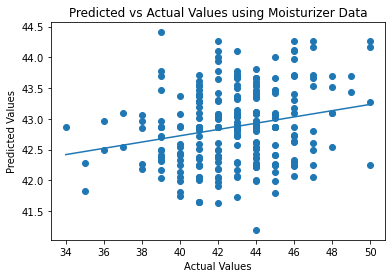

In [47]:
# Call scatterplot funtion.
moisturizer_scatter = scatterplot_mlr_results(moisturizer_new, moisturizer_predict, 'Moisturizer')


This scatter plot with the predicted vs actual values tells me that there isn't a clear linear relationship between the independent variables and the dependent variables. I want to examine a correlation map to see if there are independent variables with multicollinearity that should be removed for a better model fit. 

Based on this analysis we fail to reject the null hypothesis for moisturizer ingredients affecting customer ranking. 

<a id='eyecream'></a>
### Eye Cream


In [48]:
# Call the function with dataframe and ingredients list
eye_cream_new = add_ingredient_columns(eye_cream, eye_cream_ing)

# Display the resulting DataFrame
eye_cream_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 1093 to 1301
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         179 non-null    object 
 1   brand                         179 non-null    object 
 2   name                          179 non-null    object 
 3   price                         179 non-null    int64  
 4   rank                          179 non-null    float64
 5   ingredients                   179 non-null    object 
 6   glycerin                      179 non-null    int64  
 7   butylene glycol               179 non-null    int64  
 8   dimethicone                   179 non-null    int64  
 9   sodium hyaluronate            179 non-null    int64  
 10  tocopheryl acetate            179 non-null    int64  
 11  caffeine                      179 non-null    int64  
 12  caprylyl glycol               179 non-null    int64  
 13  c

In [49]:
# Call model to fit, then predict the model. It will also print out the summary results. 
eye_cream_model = fit_mlr(eye_cream_new, eye_cream_ing)
eye_cream_predict = predict_mlr(eye_cream_model, eye_cream_new)


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9195
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.517
Time:                        11:11:16   Log-Likelihood:                -516.76
No. Observations:                 179   AIC:                             1056.
Df Residuals:                     168   BIC:                             1091.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The R-Squared number indicates that only 5.2% of the variation in the dependent variable can be explained by the independent variables. However, an adjusted r-squared score of -0.005 indicated that this model isn't a great fit for the data, the p-value of 0.517 also validates that this is not a great fit for the model. 

The independent variable's coefficients, t-statistics, and p-values determine if each variable is statistically significant in predicting the dependent variable. In this case, some of the coefficients are positive, and others are negative which could indicate multicollinearity in the model and will need further exploration. Each independent variable in this test has a p-value greater than 0.05 which means that none of them are statistically significant in explaining the dependent variable. 


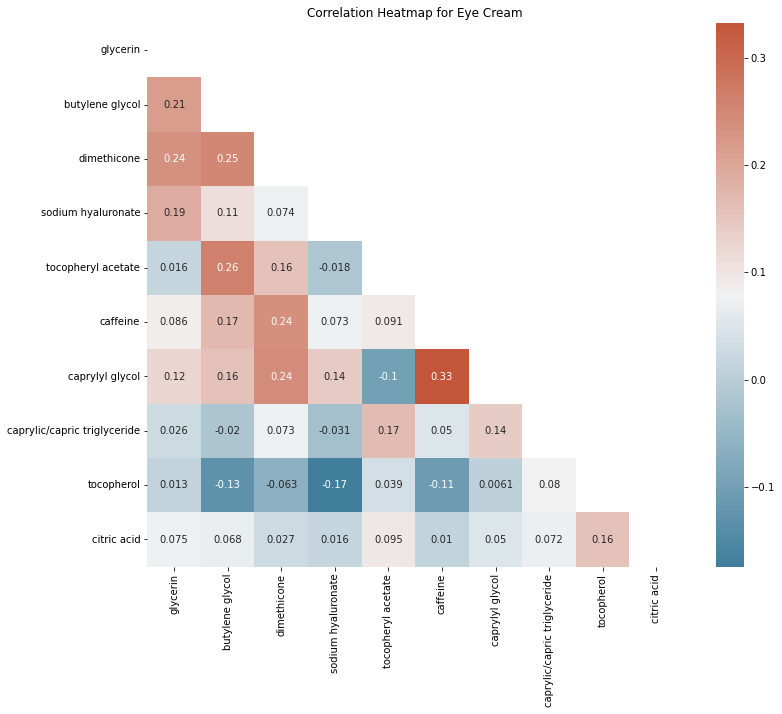

In [50]:
# Call correlation plot funtion.
eye_cream_corr = create_correlation_plot(eye_cream_new, eye_cream_ing, 'Eye Cream')


This heatmap charts the strength of the relationships between all of the independent variables. To be statistically significant and indicate multicollinearity we would need to have a coefficient greater than 0.7. The highest coefficient is 0.33 between caprylyl glycol and caffeine, therefore we don't have any relationships strong enough between our independent variables to illustrate multicollinearity. 



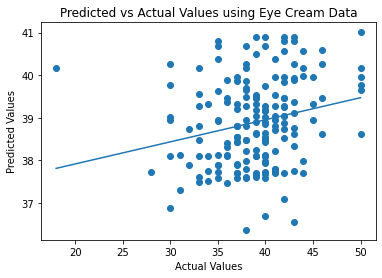

In [51]:
# Call scatterplot funtion.
eye_cream_scatter = scatterplot_mlr_results(eye_cream_new, eye_cream_predict, 'Eye Cream')


This scatter plot with the predicted vs actual values tells me that there isn't a clear linear relationship between the independent variables and the dependent variable. I want to examine a correlation map to see if there are independent variables with multicollinearity that should be removed for a better model fit. 

Based on this analysis we fail to reject the null hypothesis for eye cream ingredients affecting customer ranking. 

<a id='treat'></a>
### Treatment


In [52]:
# Call the function with dataframe and ingredients list
treatment_new = add_ingredient_columns(treatment, treatment_ing)

# Display the resulting DataFrame
treatment_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 579 to 826
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         225 non-null    object 
 1   brand                         225 non-null    object 
 2   name                          225 non-null    object 
 3   price                         225 non-null    int64  
 4   rank                          225 non-null    float64
 5   ingredients                   225 non-null    object 
 6   glycerin                      225 non-null    int64  
 7   butylene glycol               225 non-null    int64  
 8   sodium hyaluronate            225 non-null    int64  
 9   caprylyl glycol               225 non-null    int64  
 10  dimethicone                   225 non-null    int64  
 11  tocopheryl acetate            225 non-null    int64  
 12  caprylic/capric triglyceride  225 non-null    int64  
 13  toc

In [53]:
# Call model to fit, then predict the model. It will also print out the summary results. 
treatment_model = fit_mlr(treatment_new, treatment_ing)
treatment_predict = predict_mlr(treatment_model, treatment_new)


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.382
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.190
Time:                        11:11:16   Log-Likelihood:                -609.42
No. Observations:                 225   AIC:                             1241.
Df Residuals:                     214   BIC:                             1278.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       



The R-Squared number indicates that only 6.1% of the variation in the dependent variable can be explained by the independent variables. However, an adjusted r-squared score of 0.017 indicated that this model isn't a great fit for the data, the p-value of 0.190 also validates that this is not a great fit for the model. 

The independent variable's coefficients, t-statistics, and p-values determine if each variable is statistically significant in predicting the dependent variable. In this case, some of the coefficients are positive, and others are negative which could indicate multicollinearity in the model and will need further exploration. Caprylic/capric triglyceride has a positive correlation and a p-value of 0.032 which could indicate significants, but we need to explore the model further.


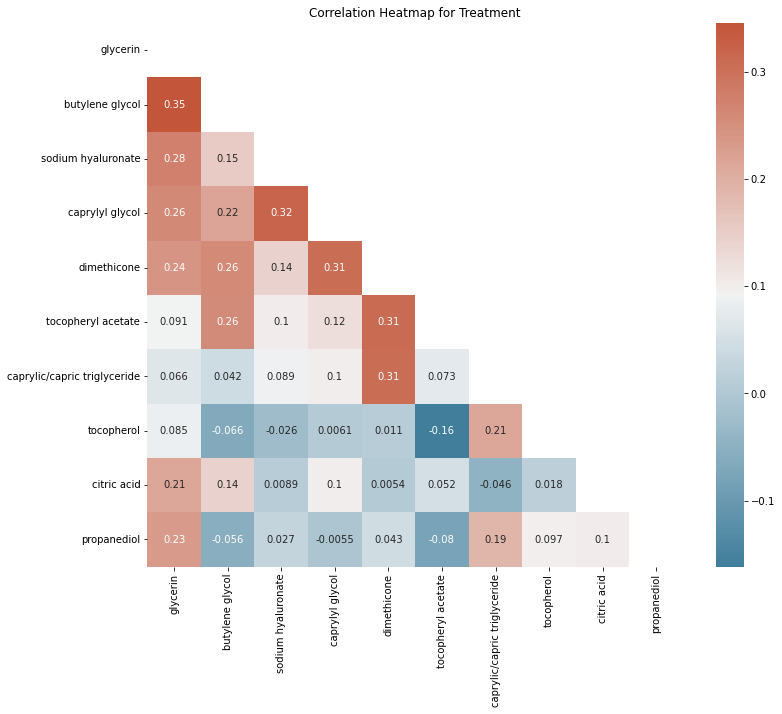

In [54]:
# Call correlation plot funtion.
treatment_corr = create_correlation_plot(treatment_new, treatment_ing, 'Treatment')


This heatmap charts the strength of the relationships between all of the independent variables. To be statistically significant and indicate multicollinearity we would need to have a coefficient greater than 0.7. The highest coefficient is 0.35 between butylene glycol and glycerin, therefore we don't have any relationships strong enough between our independent variables to illustrate multicollinearity. 



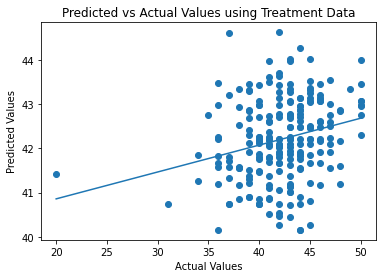

In [55]:
# Call scatterplot funtion.
treatment_scatter = scatterplot_mlr_results(treatment_new, treatment_predict, 'Treatment')


This scatter plot with the predicted vs actual values tells me that there isn't a clear linear relationship between the independent variables and the dependent variable. I want to examine a correlation map to see if there are independent variables with multicollinearity that should be removed for a better model fit. 

Based on this analysis we fail to reject the null hypothesis for treatment ingredients affecting the customer ranking. 

<a id='sunscreen'></a>
### Sun Protect

In [56]:
# Call the function with dataframe and ingredients list
sunscreen_new = add_ingredient_columns(sunscreen, sunscreen_ing)

# Display the resulting DataFrame
sunscreen_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1304 to 1470
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         151 non-null    object 
 1   brand                         151 non-null    object 
 2   name                          151 non-null    object 
 3   price                         151 non-null    int64  
 4   rank                          151 non-null    float64
 5   ingredients                   151 non-null    object 
 6   glycerin                      151 non-null    int64  
 7   butylene glycol               151 non-null    int64  
 8   dimethicone                   151 non-null    int64  
 9   caprylyl glycol               151 non-null    int64  
 10  tocopheryl acetate            151 non-null    int64  
 11  tocopherol                    151 non-null    int64  
 12  sodium hyaluronate            151 non-null    int64  
 13  c

In [57]:
# Call model to fit, then predict the model. It will also print out the summary results. 
sunscreen_model = fit_mlr(sunscreen_new, sunscreen_ing)
sunscreen_predict = predict_mlr(sunscreen_model, sunscreen_new)


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.6320
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.784
Time:                        11:11:16   Log-Likelihood:                -450.90
No. Observations:                 151   AIC:                             923.8
Df Residuals:                     140   BIC:                             957.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The R-Squared number indicates that only 4.3% of the variation in the dependent variable can be explained by the independent variables. However, an adjusted r-squared score of -0.025 indicated that this model isn't a great fit for the data, the p-value of 0.784 also validates that this is not a great fit for the model. 

The independent variable's coefficients, t-statistics, and p-values determine if each variable is statistically significant in predicting the dependent variable. In this case, some of the coefficients are positive, and others are negative which could indicate multicollinearity in the model and will need further exploration. Each independent variable in this test has a p-value greater than 0.05 which means that none of them are statistically significant in explaining the dependent variable. 

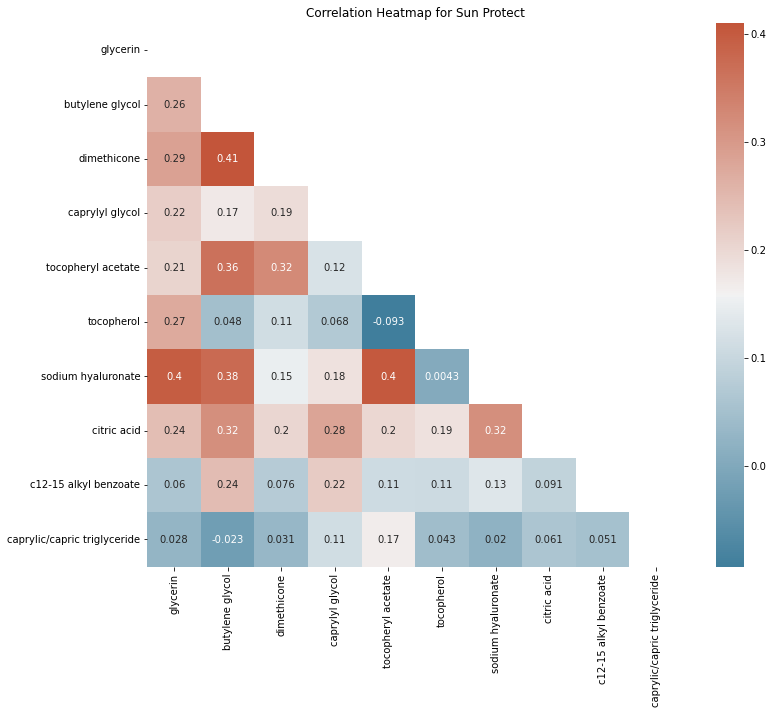

In [58]:
# Call correlation plot funtion.
sunscreen_corr = create_correlation_plot(sunscreen_new, sunscreen_ing, 'Sun Protect')


This heatmap charts the strength of the relationships between all of the independent variables. To be statistically significant and indicate multicollinearity we would need to have a coefficient greater than 0.7. The highest coefficient is 0.4 between sodium hyaluronate and glycerin and sodium hyaluronate and tocopheryl acetate, therefore we don't have any relationships strong enough between our independent variables to illustrate multicollinearity. 



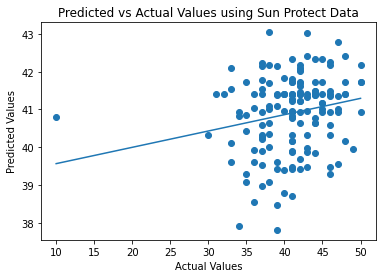

In [59]:
# Call scatterplot funtion.
sunscreen_scatter = scatterplot_mlr_results(sunscreen_new, sunscreen_predict, 'Sun Protect')


This scatter plot with the predicted vs actual values tells me that there isn't a clear linear relationship between the independent variables and the dependent variables. I want to examine a correlation map to see if there are independent variables with multicollinearity that should be removed for a better model fit. 

Based on this analysis we fail to reject the null hypothesis for sunscreen ingredients affecting customer ranking. 

In [60]:
top_int = cleanser_ing + mask_ing + moisturizer_ing + eye_cream_ing + treatment_ing + sunscreen_ing
top_counts = Counter(top_int)
top_counts = top_counts.most_common()


In [61]:
keys = [x[0] for x in top_counts]
values = [x[1] for x in top_counts]


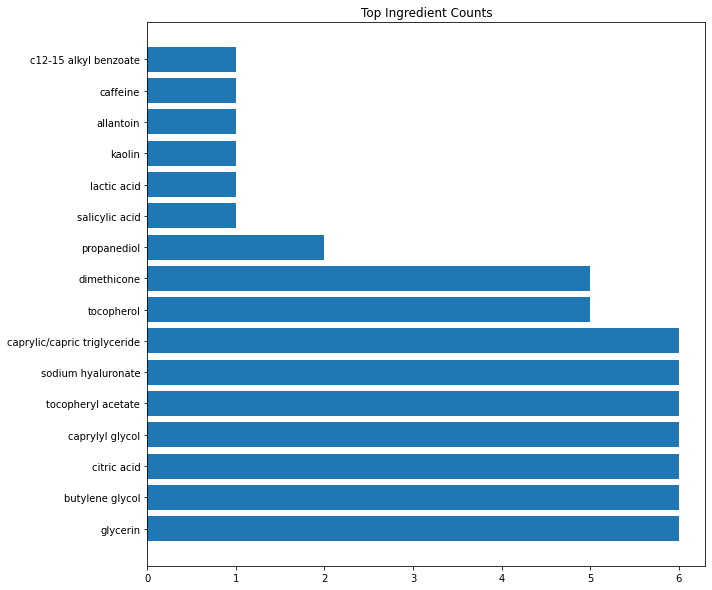

In [62]:
plt.figure(figsize=(10,10))
plt.barh(keys, values)
plt.title("Top Ingredient Counts")
plt.show()
